In [1]:
import os
import h5py
import cv2
import numpy as np
import pandas as pd
import sklearn as skl
from matplotlib import pyplot as plt

from pdf2image import convert_from_path, convert_from_bytes

### install tesseract

sudo apt install tesseract-ocr

sudo apt install tesseract-ocr-deu

sudo apt install libtesseract-dev

conda install -c conda-forge pytesseract

In [2]:
import pytesseract

In [3]:
# set home directory
home_path = os.getcwd()[:os.getcwd().find('Code/python/obf_autax/ocr')-1]
# set input_path
input_path = os.path.join(home_path, 'Data', 'obf', 'Haselbach_Mannersdorf_30042020.pdf')
#Operat Hinterriß

In [4]:
input_path

'/home/philipp/Data/obf/Haselbach_Mannersdorf_30042020.pdf'

In [5]:
pwd

'/home/philipp/Code/python/obf_autax/ocr'

In [6]:
def convert_to_image(input_path, page_nr):

    pages = convert_from_path(input_path, 500, first_page=page_nr, last_page=page_nr)

    return pages[0]

In [7]:
img = convert_to_image(input_path, 3).convert('RGB')

In [8]:
#img

In [9]:
# Convert PIL image to numpy array
img = np.array(img)
# Convert RGB to BGR
#img = img[:, :, ::-1].copy()

In [10]:
img.shape

(5847, 4134, 3)

In [11]:
from OCRPage import OCRPage

In [12]:
img = convert_to_image(input_path, 113).convert('RGB')
img = np.array(img)
ocr = OCRPage(img)
ocr.convert()

In [13]:
#plt.imshow(ocr.img_thresh, 'gray')

In [14]:
ma = ocr.get_text('mass')

In [15]:
# split lines
ma = ma.splitlines()

In [16]:
ma

['DF4,7300023435', 'El Kronen freistellen']

In [17]:
ma[0].find(',')

3

In [18]:
ocr.get_spaces()

3 1


[array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])]

In [43]:
ma1 = ma[0]

In [44]:
ma1.find(',')

3

In [46]:
ma1[3]

','

In [52]:
spaces

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [53]:
spaces1 = spaces.copy()

In [54]:
spaces1 = np.insert(spaces1,3,0)

In [55]:
spaces1[3-1]=0

In [56]:
spaces1

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [62]:
ma[0]

'DF4,7300023435'

In [75]:
l = []
ch = ""

for i in range(len(ma[0])):
    
    if i == 0:
        ch = ma[0][i]
    elif i == len(ma[0])-1:
        l.append(ch + ma[0][i])
    elif spaces1[i-1] == 0:
        ch = ch + ma[0][i]
    elif spaces1[i-1] == 1:
        l.append(ch)
        ch = ma[0][i]

In [76]:
l

['DF', '4,7', '300', '0', '2', '3', '4', '35']

In [67]:
len(ma[0])-1

13

In [40]:
spaces = ocr.get_spaces()[0]

In [19]:
ocr.get_text('bz')

''

In [21]:
txt = ocr.get_text('text')

In [23]:
# split lines
txt = txt.splitlines()

In [24]:
txt

['ST im Süden breiter Rücken, am Rücken steinig mit STOE 71 und HD-Typ',
 'BE einige ES KB BU BI AH Kl, Elam Rücken, einige eingewachsene BU-El-Überhälter, ungleichaltrig +/- 10 Jahre, Ausschlagswald']

In [25]:
for line in txt:
    print(line[0:2])

ST
BE


In [17]:
ocr.get_text('stoe')

''

In [19]:
ocr.get_text('vtyp')

''

In [20]:
ocr.get_text('wtyp')

'LAFI'

In [21]:
ocr.get_text('vg')

'2'

In [22]:
ocr.get_text('fss')

''

In [30]:
imagem = cv2.bitwise_not(ocr.img_thresh)

In [31]:
imagem

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [27]:
imgx = ocr.cut_feature(ocr.img_thresh, "mass")

rects = ocr.find_objects(imgx)
# convert to numpy array
rects = np.asarray(rects)

In [28]:
rects

array([[   0,    0, 3935,  828]])

In [36]:
imgx = cv2.bitwise_not(ocr.img_thresh)
imgx = ocr.cut_feature(imgx, "mass")

rects = ocr.find_objects(imgx)
# convert to numpy array
rects = np.asarray(rects)
# filter noise (small points)
rec_fil = rects[rects[:,3] > np.mean(rects[:,3])/3]
# get amount of Nutzungsmaßnahmen
rec_fil[:,1] = rec_fil[:,1] + rec_fil[:,3]
# get unique row positions
rows_pos = np.sort(np.unique(rec_fil[:,1]))

spaces = []

for i in range(0,rows_pos.size-1,2):
    print(i)
    # filter only nutzungs row
    rec_fil_fil = rec_fil[np.where(rec_fil[:,1] == rows_pos[i])]
    # invert array on first column
    rec_fil_fil = rec_fil_fil[::-1]
    # position of char on x-axis -> column 0
    pos_x = rec_fil_fil[:,0,].copy()
    # median width > column 2
    width_m = np.median(rec_fil_fil[:,2,])
    # space (pixels) between characters
    diff = pos_x[1:] - (pos_x[:-1]+int(width_m))
    # use otsu algorithm to obtain the best threshold value
    thresh_val = ocr.otsu(diff)

    diff[np.where(diff < thresh_val)] = 0
    diff[np.where(diff >= thresh_val)] = 1

    spaces.append(diff)

0


In [37]:
spaces

[array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0])]

In [23]:
ocr.get_spaces()

ZeroDivisionError: float division by zero

## Cut image

In [18]:
def cut_img(img, cut):
    '''
        cuts the desired part [cut_boundries] out of the image [self.img]
        in:     cut_boundries   (array with boundries)
        out:
    '''
    # cut image
    return(img[cut[0]:cut[1], cut[2]:cut[3], :])

### cut Abteilung

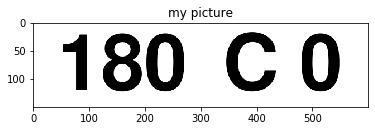

In [19]:
img_abt = cut_img(img, cut = [100, 250, 3400, 4000])

gray = cv2.cvtColor(img_abt, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,'gray')
plt.title('my picture')
plt.show()

In [20]:
gray

array([[192, 192, 192, ..., 192, 192, 192],
       [192, 192, 192, ..., 192, 192, 192],
       [192, 192, 192, ..., 192, 192, 192],
       ...,
       [192, 192, 192, ..., 192, 192, 192],
       [192, 192, 192, ..., 192, 192, 192],
       [192, 192, 192, ..., 192, 192, 192]], dtype=uint8)

In [22]:
ret, img_thr = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)

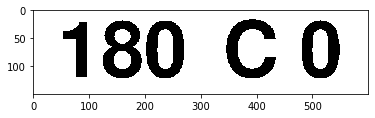

In [23]:
plt.imshow(img_thr,'gray')

In [21]:
text = .ocr(gray)

NameError: name 'self' is not defined

### cut Maßnahme

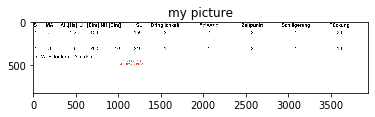

True

In [20]:
img_ma = cut_img(img, cut = [2242, 3070, 120, 4055])

#gray = cv2.cvtColor(img_abt, cv2.COLOR_BGR2GRAY)

plt.imshow(img_ma)
plt.title('my picture')
plt.show()
cv2.imwrite('text.png', img_ma) 

### cut Bestockungsziel

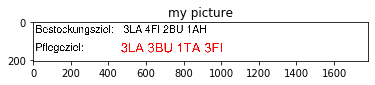

True

In [15]:
img_bz = cut_img(img, cut = [1540, 1745, 2270, 4050])

#gray = cv2.cvtColor(img_abt, cv2.COLOR_BGR2GRAY)

plt.imshow(img_bz)
plt.title('my picture')
plt.show()
cv2.imwrite('text.png', img_bz) 

### cut Text

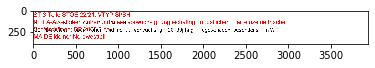

True

In [16]:
img_txt = cut_img(img, cut = [1810, 2200, 120, 4055])

#gray = cv2.cvtColor(img_abt, cv2.COLOR_BGR2GRAY)

plt.imshow(img_txt)
plt.show()
img_txt_print = img_txt[:, :, ::-1].copy()
cv2.imwrite('text.png', img_txt_print) 

### cut Standort

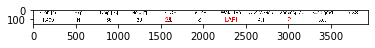

True

In [30]:
img_stoe = cut_img(img, cut = [400, 560, 120, 4055])

#gray = cv2.cvtColor(img_abt, cv2.COLOR_BGR2GRAY)

plt.imshow(img_stoe)
plt.show()
cv2.imwrite('text.png', img_stoe) 

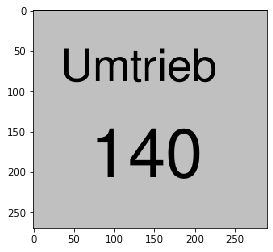

In [71]:
img_stoe = cut_img(img, cut = [100, 370, 2350, 2640])

#gray = cv2.cvtColor(img_abt, cv2.COLOR_BGR2GRAY)

plt.imshow(img_stoe)
plt.show()

In [47]:
img_txt = cv2.imread('text.png')
img_txt = img_txt[:, :, ::-1]

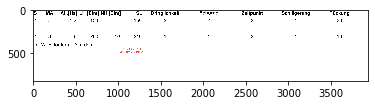

In [23]:
plt.imshow(img_ma)

In [35]:
img_txt = img_ma.copy()

In [36]:
img_ma.shape

(828, 3935, 3)

In [37]:
def filter_red_img(img):
    '''
        * private *
        filter just red color
        in:     im          (RGB image)
        out:    output_img  (red filterd image)
    '''
    # convert to hsv
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(img_hsv, lower_red, upper_red)
    # upper mask (170-180)
    lower_red = np.array([170,50,80])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(img_hsv, lower_red, upper_red)
    ## Merge the mask and crop the red regions
    mask = cv2.bitwise_or(mask0, mask1)
    croped = cv2.bitwise_and(img_hsv, img_hsv, mask=mask)
    # join my masks
    #mask = mask0 + mask1
    # apply mask
    #img2 = img[np.where(mask==0)] = 255
    
    return(mask, croped)

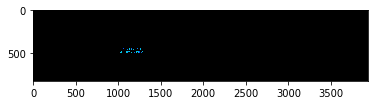

In [51]:
mask, img_txt_f = filter_red_img(img_txt)
img_txt_f
plt.imshow(img_txt_f, 'gray')

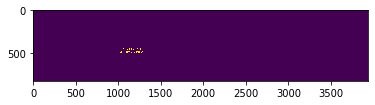

In [52]:
plt.imshow(mask)

In [46]:
img_hsv = cv2.cvtColor(img_ma, cv2.COLOR_BGR2HSV)

In [47]:
img_hsv[48, 1134]

array([  0,   0, 255], dtype=uint8)

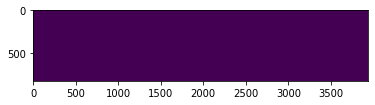

In [50]:
lower_red = np.array([100,200,200])
upper_red = np.array([140,255,255])

mask = cv2.inRange(img_hsv, lower_red, upper_red)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
res = cv2.bitwise_and(img_txt,img_txt, mask= mask)
#res = img_txt[np.where(mask==0)] = 255

plt.imshow(mask)


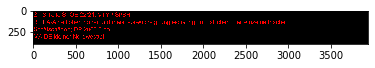

In [66]:
plt.imshow(res)

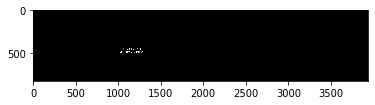

In [53]:
img_gray = cv2.cvtColor(img_txt_f, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, 'gray')

In [54]:
cv2.imwrite('gray.png', img_gray) 

True

In [129]:
img_gray = cv2.imread('gray.png', cv2.IMREAD_GRAYSCALE)

In [84]:
ret, img_thr = cv2.threshold(img_gray, 90, 255, cv2.THRESH_BINARY)

In [85]:
img_thr.shape

(828, 3935)

In [58]:
np.unique(np.reshape(img_thr, img_thr.shape[0] * img_thr.shape[1]))

array([  0, 255], dtype=uint8)

In [66]:
def find_obj_in_img(img):
    '''
        * private *
        find objects in image
        in:     self.img           (grayscale image)
        out:    rects           (coordinates of detected objects)
    '''
    # Find contours in the image
    im2, ctrs, hier = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Get rectangles contains each contour
    rects = [cv2.boundingRect(ctr) for ctr in ctrs]
    return rects

In [67]:
rects = find_obj_in_img(img_thr)

In [68]:
rects

[(0, 0, 3935, 828)]

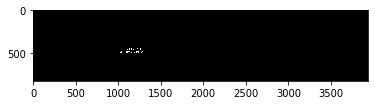

In [86]:
plt.imshow(img_thr, 'gray')

In [87]:
im2, ctrs, hier = cv2.findContours(img_thr.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [105]:
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

In [113]:
rects

[(1279, 482, 11, 15),
 (1263, 482, 13, 15),
 (1235, 482, 12, 15),
 (1212, 482, 11, 15),
 (1206, 482, 2, 15),
 (1190, 482, 13, 15),
 (1182, 482, 7, 15),
 (1150, 482, 11, 15),
 (1127, 482, 12, 15),
 (1118, 482, 7, 15),
 (1103, 482, 12, 15),
 (1078, 482, 7, 15),
 (1062, 482, 13, 15),
 (1225, 479, 8, 18),
 (1206, 477, 2, 3),
 (1070, 477, 3, 3),
 (1064, 477, 3, 3),
 (1039, 477, 3, 20),
 (1023, 477, 13, 20),
 (1257, 476, 3, 21),
 (1251, 476, 2, 21),
 (1171, 476, 9, 21),
 (1087, 476, 12, 21),
 (1052, 476, 9, 21),
 (1261, 444, 12, 20),
 (1244, 444, 13, 20),
 (1221, 444, 14, 20),
 (1199, 444, 13, 20),
 (1177, 444, 13, 20),
 (1155, 444, 12, 20),
 (1132, 444, 12, 20),
 (1117, 444, 12, 20),
 (1101, 444, 12, 20),
 (1078, 444, 12, 20),
 (1064, 444, 7, 20),
 (1041, 444, 12, 20),
 (1023, 444, 14, 20)]

In [ ]:
rows = self.sort_nutz(rects)

In [116]:
max(rects[2])

1235

In [130]:
img_test = img_thr.copy()

In [131]:
for rect in rec_fil:
    cv2.rectangle(img_test, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (255,255,255))#, thickness, lineType, shift)

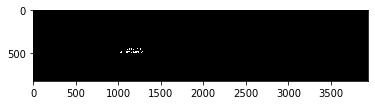

In [132]:
plt.imshow(img_test, 'gray')

In [133]:
cv2.imwrite('cont.png', img_test) 

True

In [117]:
# convert to numpy array
rec_arr = np.asarray(rects)

In [118]:
rec_arr[]

array([[1279,  482,   11,   15],
       [1263,  482,   13,   15],
       [1235,  482,   12,   15],
       [1212,  482,   11,   15],
       [1206,  482,    2,   15],
       [1190,  482,   13,   15],
       [1182,  482,    7,   15],
       [1150,  482,   11,   15],
       [1127,  482,   12,   15],
       [1118,  482,    7,   15],
       [1103,  482,   12,   15],
       [1078,  482,    7,   15],
       [1062,  482,   13,   15],
       [1225,  479,    8,   18],
       [1206,  477,    2,    3],
       [1070,  477,    3,    3],
       [1064,  477,    3,    3],
       [1039,  477,    3,   20],
       [1023,  477,   13,   20],
       [1257,  476,    3,   21],
       [1251,  476,    2,   21],
       [1171,  476,    9,   21],
       [1087,  476,   12,   21],
       [1052,  476,    9,   21],
       [1261,  444,   12,   20],
       [1244,  444,   13,   20],
       [1221,  444,   14,   20],
       [1199,  444,   13,   20],
       [1177,  444,   13,   20],
       [1155,  444,   12,   20],
       [11

In [122]:
dig_median = np.median(rec_arr[:,3])
dig_median

20.0

In [123]:
dig_mean = np.mean(rec_arr[:,3])
dig_mean

16.945945945945947

In [124]:
# filter noise (small points)
rec_fil = rec_arr[rec_arr[:,3] > dig_median/3]

In [125]:
rec_fil

array([[1279,  482,   11,   15],
       [1263,  482,   13,   15],
       [1235,  482,   12,   15],
       [1212,  482,   11,   15],
       [1206,  482,    2,   15],
       [1190,  482,   13,   15],
       [1182,  482,    7,   15],
       [1150,  482,   11,   15],
       [1127,  482,   12,   15],
       [1118,  482,    7,   15],
       [1103,  482,   12,   15],
       [1078,  482,    7,   15],
       [1062,  482,   13,   15],
       [1225,  479,    8,   18],
       [1039,  477,    3,   20],
       [1023,  477,   13,   20],
       [1257,  476,    3,   21],
       [1251,  476,    2,   21],
       [1171,  476,    9,   21],
       [1087,  476,   12,   21],
       [1052,  476,    9,   21],
       [1261,  444,   12,   20],
       [1244,  444,   13,   20],
       [1221,  444,   14,   20],
       [1199,  444,   13,   20],
       [1177,  444,   13,   20],
       [1155,  444,   12,   20],
       [1132,  444,   12,   20],
       [1117,  444,   12,   20],
       [1101,  444,   12,   20],
       [10

In [147]:
# row with Nutzungszeile and without text
rec_fil[-1,1]

444

In [166]:
# filter only nutzungs row
rec_fil_fil = rec_fil[np.where(rec_fil[:,1] == rec_fil[-1,1])]

In [172]:
# invert array on first column
rec_fil_fil = rec_fil_fil[::-1]

In [ ]:
np.median

In [182]:
rec_fil_fil.shape[0]

13

In [190]:
# position on x-axis -> column 0
pos_x = rec_fil_fil[:,0,].copy()

In [191]:
# width of characters on x-axis -> column 2
width = rec_fil_fil[:,2,].copy()

In [193]:
# median width
width_m = np.median(width)

In [194]:
pos_x

array([1023, 1041, 1064, 1078, 1101, 1117, 1132, 1155, 1177, 1199, 1221,
       1244, 1261])

In [197]:
# space in between characters
diff = pos_x[1:] - (pos_x[:-1]+int(width_m))

In [198]:
diff

array([ 6, 11,  2, 11,  4,  3, 11, 10, 10, 10, 11,  5])

In [200]:
np.mean(diff)

7.833333333333333

In [201]:
diff[np.where(diff <= np.mean(diff))]

array([6, 2, 4, 3, 5])

In [203]:
diff[np.where(diff > np.mean(diff))]

array([11, 11, 11, 10, 10, 10, 11])

In [199]:
print(np.max(diff))
print(np.median(diff))

11
10.0


22.0

In [164]:
diff

array([18, 23, 14, 23, 16, 15, 23, 22, 22, 22, 23, 17])

In [165]:
(23-14)

9

In [205]:
his, bins = np.histogram(diff, np.array(range(0, np.max(diff))))

In [210]:
def otsu(gray):
    pixel_number = gray.shape[0]
    mean_weigth = 1.0/pixel_number
    his, bins = np.histogram(gray, np.array(range(0, np.max(gray))))
    final_thresh = -1
    final_value = -1
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        Wb = np.sum(his[:t]) * mean_weigth
        Wf = np.sum(his[t:]) * mean_weigth

        mub = np.mean(his[:t])
        muf = np.mean(his[t:])

        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value
    #final_img = gray.copy()
    #print(final_thresh)
    #final_img[gray > final_thresh] = 255
    #final_img[gray < final_thresh] = 0
    return final_thresh

In [211]:
otsu(diff)

9

In [ ]:
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weigth = 1.0/pixel_number
    his, bins = np.histogram(gray, np.array(range(0, 256)))
    final_thresh = -1
    final_value = -1
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        Wb = np.sum(his[:t]) * mean_weigth
        Wf = np.sum(his[t:]) * mean_weigth

        mub = np.mean(his[:t])
        muf = np.mean(his[t:])

        value = Wb * Wf * (mub - muf) ** 2

        print("Wb", Wb, "Wf", Wf)
        print("t", t, "value", value)

        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img

In [ ]:
# convert to numpy array
rec_arr = np.asarray(rects)
# compute median of hight
dig_median = np.median(rec_arr[:,3])
# filter line
rec_fil = rec_arr[rec_arr[:,3] < dig_median*2]
# filter noise (small points)
rec_fil = rec_arr[rec_arr[:,3] > dig_median/3]
# sort by y coordinate (highes fist)
rec_fil = np.sort(rec_fil.view('i8,i8,i8,i8'), order=['f1'], axis=0).view(np.int)
# first digit
rec_line = rec_fil[:,1]
# compute mean hight
mean_hight = rec_fil[:,3].mean()

In [21]:
# Adding custom options
custom_config = r'-l deu --oem 3 --psm 6'
pytesseract.image_to_string(img_thr, config=custom_config)

'ST 3 Teile STOE 22/21; VTYP SI/BH\n\nBE LA-Anteil oben höher und meist vorwüchsig; ungleichaltrig, im östlichen Teil einzelne frische\nSchälschäden; DP 2003 6 ha\n\nMA DE kleiner Nordwestteil'

In [ ]:
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
